# Exploring SPMV

First, include some libraries

In [95]:
# Run boilerplate code to set up environment

%run prelude.py

Prelude loaded OK


## Preprocessing Graph

In [152]:
#
# Function to take a 2D tensor (i.e. an adjacenc matrix) as input and generate a CSF as output
#


def create_CSF():
    


## Graph Inputs

In [127]:
#
# Function to create graph inputs
#


# Create inputs based on the slides that Aamer used to do the initial SPMV mapping on Symphony
def create_inputs(display=True):
    
    # Adjacency matrix - Ranks "S" (source) and "D" (destination)

    adjMat = Tensor.fromUncompressed([ "S", "D"],
                                [ [ 0, 1, 0, 0, 1, 1, 1, 0 ],
                                  [ 1, 0, 0, 1, 1, 1, 0, 0 ],
                                  [ 0, 0, 0, 0, 0, 0, 0, 0 ],
                                  [ 0, 1, 0, 0, 1, 0, 1, 0 ],
                                  [ 1, 1, 0, 1, 0, 1, 0, 1 ],
                                  [ 1, 1, 0, 0, 1, 0, 0, 1 ],
                                  [ 1, 0, 0, 1, 0, 0, 0, 0 ],
                                  [ 0, 0, 0, 0, 1, 1, 0, 0 ] ])

    # Vector
    srcData = Tensor.fromUncompressed([ "V" ], [ 1, 1, 1, 1, 1, 1, 1, 1 ])

    # Vector
    dstData = Tensor(rank_ids=["V"])
    
    print("Created Adjacency Matrix")
    if display:
        displayTensor(adjMat)

    print("Created Vector")
    if display:
        displayTensor(srcData)

    print("Created Output")
    if display:
        displayTensor(dstData)

    return (dstData, adjMat, srcData)



# Naive SPMV - source stationary (push)

This version traverses all neighbors of each source node.

Created Adjacency Matrix
Created Vector
Created Output
Displaying Graph


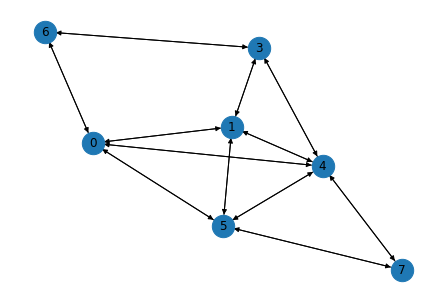

Displaying Fiber Tree Representation of Adjacency Matrix


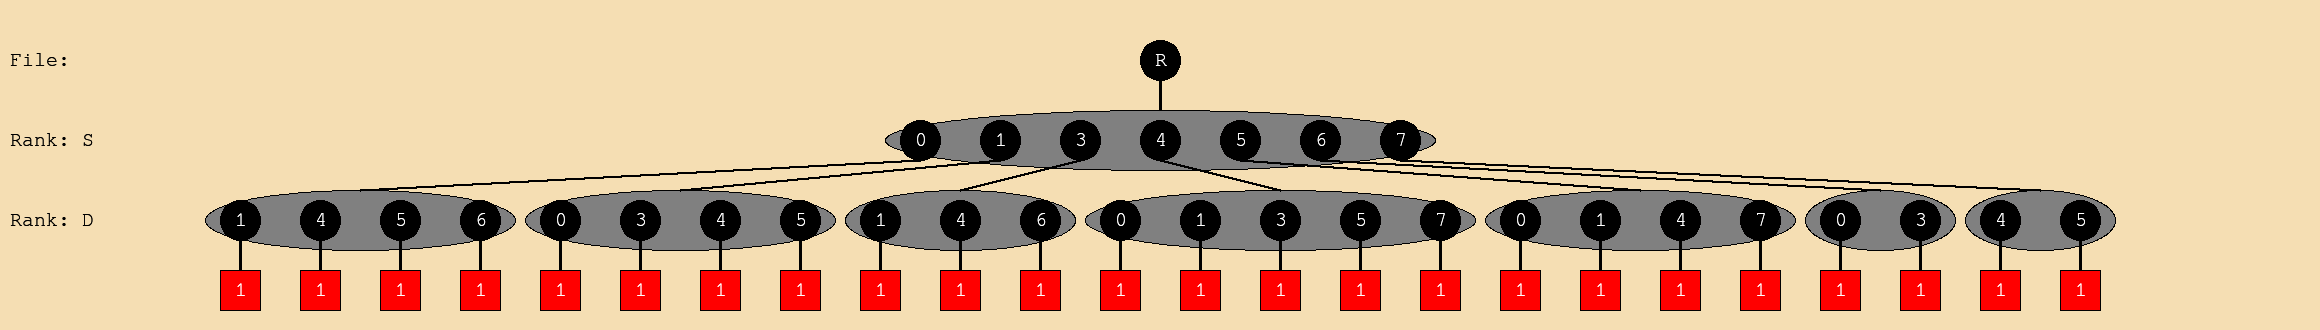

Displaying Fiber Tree Representation of Vector


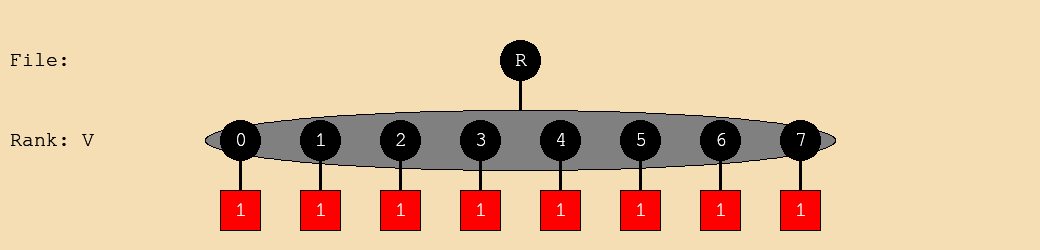

In [153]:
# Create inputs
(dstData, adjMat, srcData) = create_inputs(False)

# Get root fibers
adjMat_s  = adjMat.getRoot()
srcData_v = srcData.getRoot()
dstData_v = dstData.getRoot()

print("Displaying Graph")
displayGraph(adjMat_s)

print("Displaying Fiber Tree Representation of Adjacency Matrix")
displayTensor(adjMat)

print("Displaying Fiber Tree Representation of Vector")
displayTensor(srcData)

# create a tensor frame
canvas = TensorCanvas(adjMat, srcData, dstData)

# Perform the src stationary SPMV
for s, (adjMat_d, srcData_val) in (adjMat_s & srcData_v):
    for d, (dstData_ref, adjMat_val), in (dstData_v << adjMat_d):
        dstData_ref += adjMat_val * srcData_val
        canvas.addFrame([s,d], [s], [d])

# display the canvas animation
displayCanvas(canvas)



# Naive SPMV - destination stationary (pull)

This version traverses all neighbors of each destination node.

Created Adjacency Matrix
Created Vector
Created Output
Displaying Graph


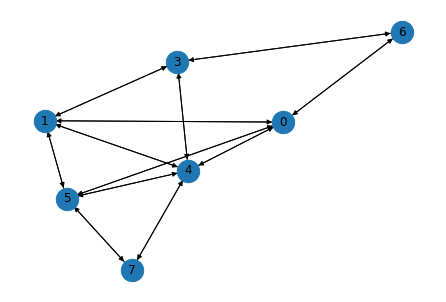

Displaying Transposed Graph


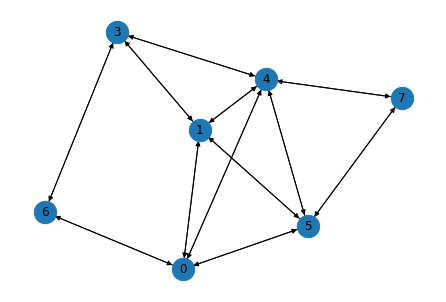

Displaying Fiber Tree Representation of Transposed Adjacency Matrix


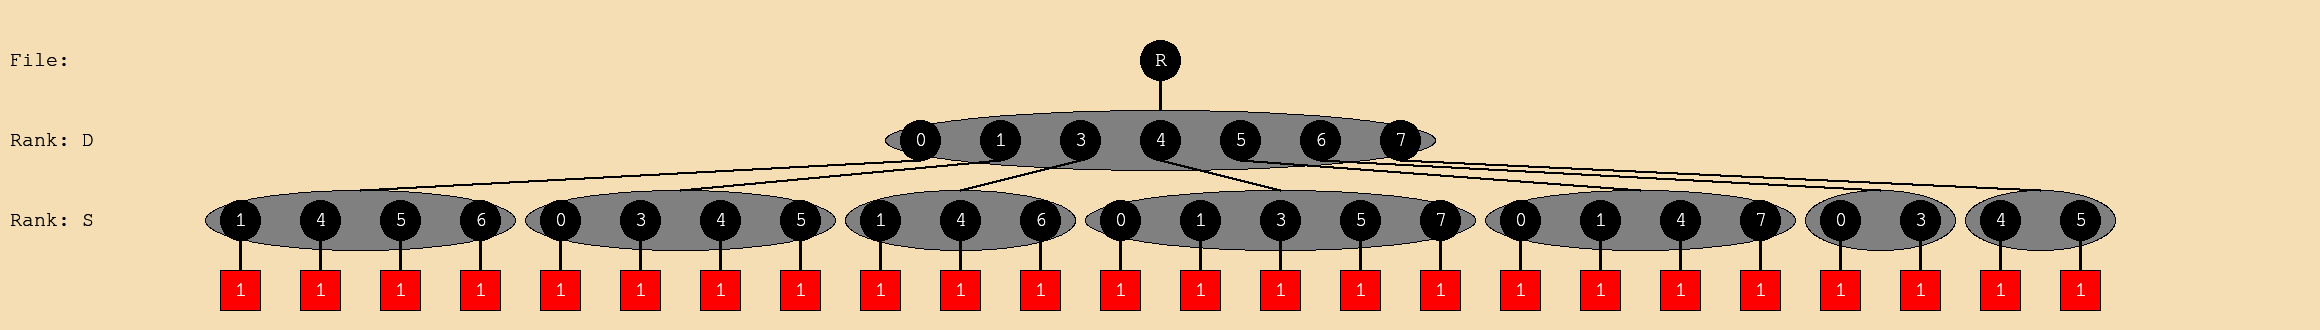

Displaying Fiber Tree Representation of srcData


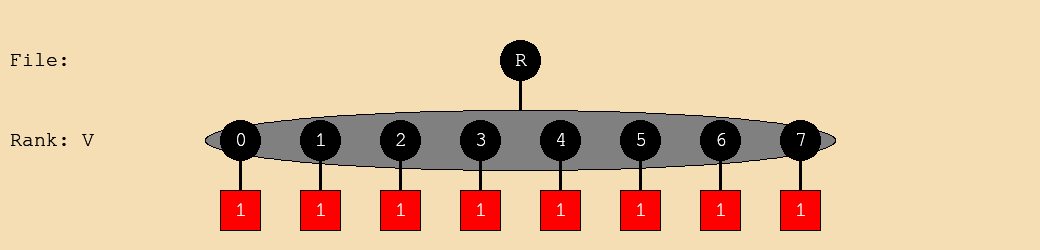

Displaying Fiber Tree Representation of dstData


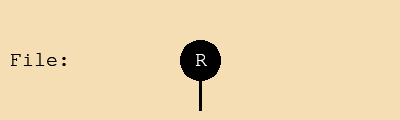

In [133]:
# Create inputs

(dstData, adjMat, srcData) = create_inputs(False)

# Get root fibers
adjMat_s  = adjMat.getRoot()
srcData_v = srcData.getRoot()
dstData_v = dstData.getRoot()

print("Displaying Graph")
displayGraph(adjMat_s)

# For destination stationary we need to swap the matrix
adjMat_transpose_d = adjMat_s.swapRanks();

print("Displaying Transposed Graph")
displayGraph(adjMat_transpose_d)

# create the actual transposed tensor in memory 
adjMat_transposed = Tensor.fromFiber(["D", "S"], adjMat_transpose_d)

print("Displaying Fiber Tree Representation of Transposed Adjacency Matrix")
displayTensor(adjMat_transposed)

print("Displaying Fiber Tree Representation of srcData")
displayTensor(srcData)

print("Displaying Fiber Tree Representation of dstData")
displayTensor(dstData)

# create the new canvas with transposed adjacency matrix
canvas = TensorCanvas(adjMat_transposed, srcData, dstData)

# Perform the destination stationary SPMV
for d, (dstData_ref, adjMat_transpose_s) in (dstData_v << adjMat_transpose_d):
    for s, (adjMat_transpose_val, srcData_val), in (adjMat_transpose_s & srcData_v):
        dstData_ref += adjMat_transpose_val * srcData_val
        canvas.addFrame([d,s], [s], [d])

# display the canvas animation
displayCanvas(canvas)



# 1D -- Spatially Tiled SPMV - src stationary (push)

This version traverses all neighbors of each source node.

Created Adjacency Matrix
Created Vector
Created Output
Tiling the adjacency matrix in coordinate space uniformly with tile size=2


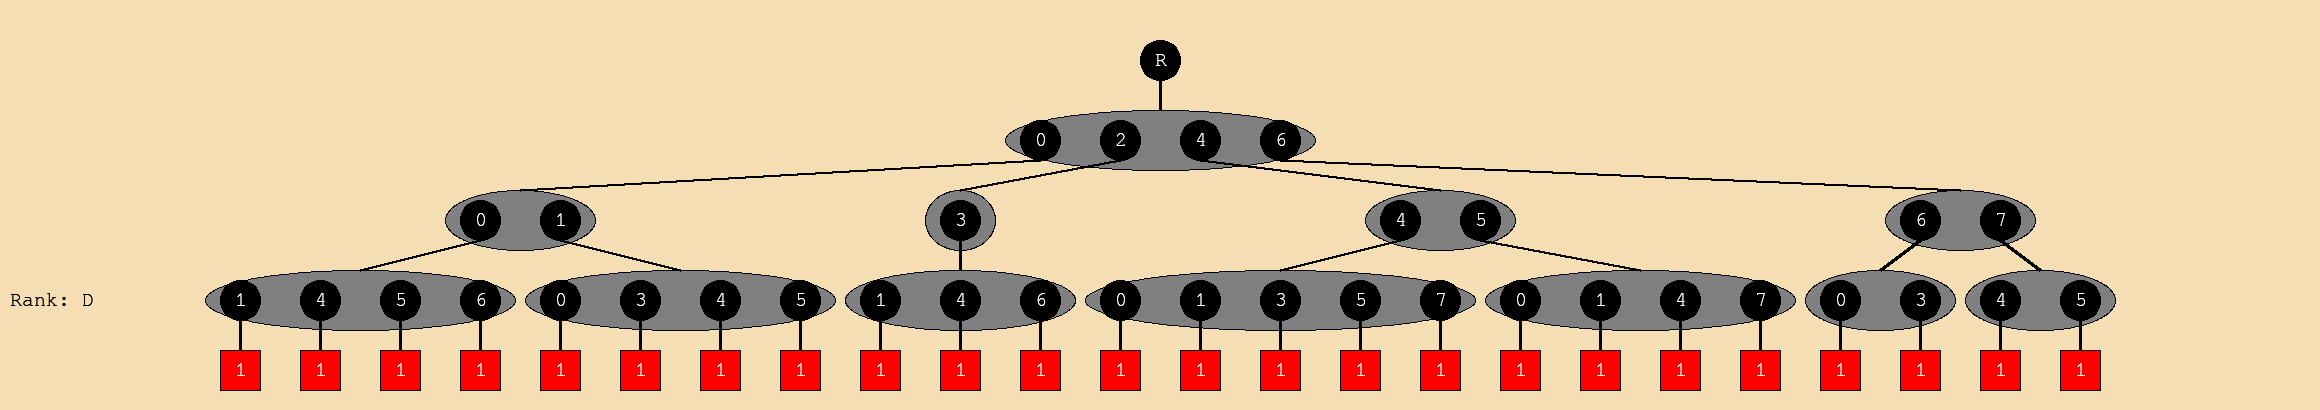

Tiling the srcData vector in coordinate space uniformly with tile size=2


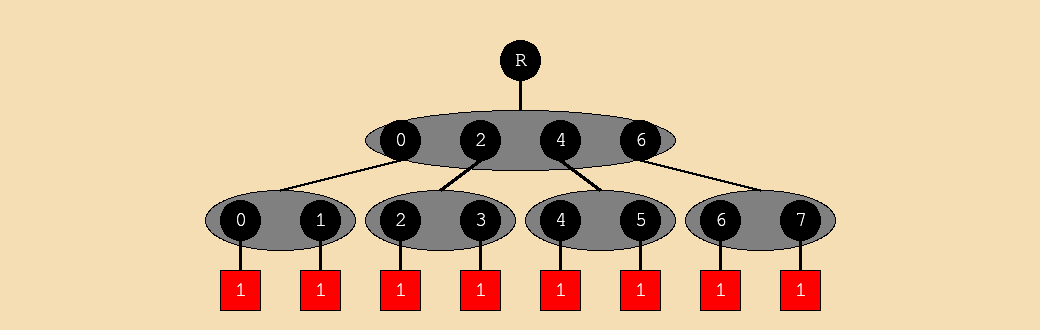

In [145]:
# Create inputs
(dstData, adjMat, srcData) = create_inputs(False)

# Get root fibers
adjMat_s  = adjMat.getRoot()
srcData_v = srcData.getRoot()
dstData_v = dstData.getRoot()

# Tile the adjacency matrix in the source dimension 
print("Tiling the adjacency matrix in coordinate space uniformly with tile size=2")
adjMat_tiled_s1 = adjMat_s.splitUniform(2)
displayTensor(adjMat_tiled_s1)

# Tile the srcData vector in the source dimension 
print("Tiling the srcData vector in coordinate space uniformly with tile size=2")
srcData_tiled_v1 = srcData_v.splitUniform(2)
displayTensor(srcData_tiled_v1)

# create a tensor frame
canvas = TensorCanvas(adjMat_tiled_s1, srcData_tiled_v1, dstData)

# perform the tiled src stationary SPMV
for s1, (adjMat_tiled_s0, srcData_tiled_v0) in (adjMat_tiled_s1 & srcData_tiled_v1):
    for s0, (adjMat_tiled_d, srcData_tiled_val) in (adjMat_tiled_s0 & srcData_tiled_v0):
        for d, (dstData_ref, adjMat_tiled_val) in (dstData_v << adjMat_tiled_d):
            dstData_ref += adjMat_tiled_val * srcData_tiled_val
            canvas.addFrame([s1,s0,d], [s1,s0], [d])

# display the canvas animation
displayCanvas(canvas)


# 2D -- Spatially Tiled SPMV - src stationary (push)  -- Work In Progress

This version traverses all neighbors of each source node.

Created Adjacency Matrix
Created Vector
Created Output
Tiling the adjacency matrix in coordinate space uniformly with tile size=2


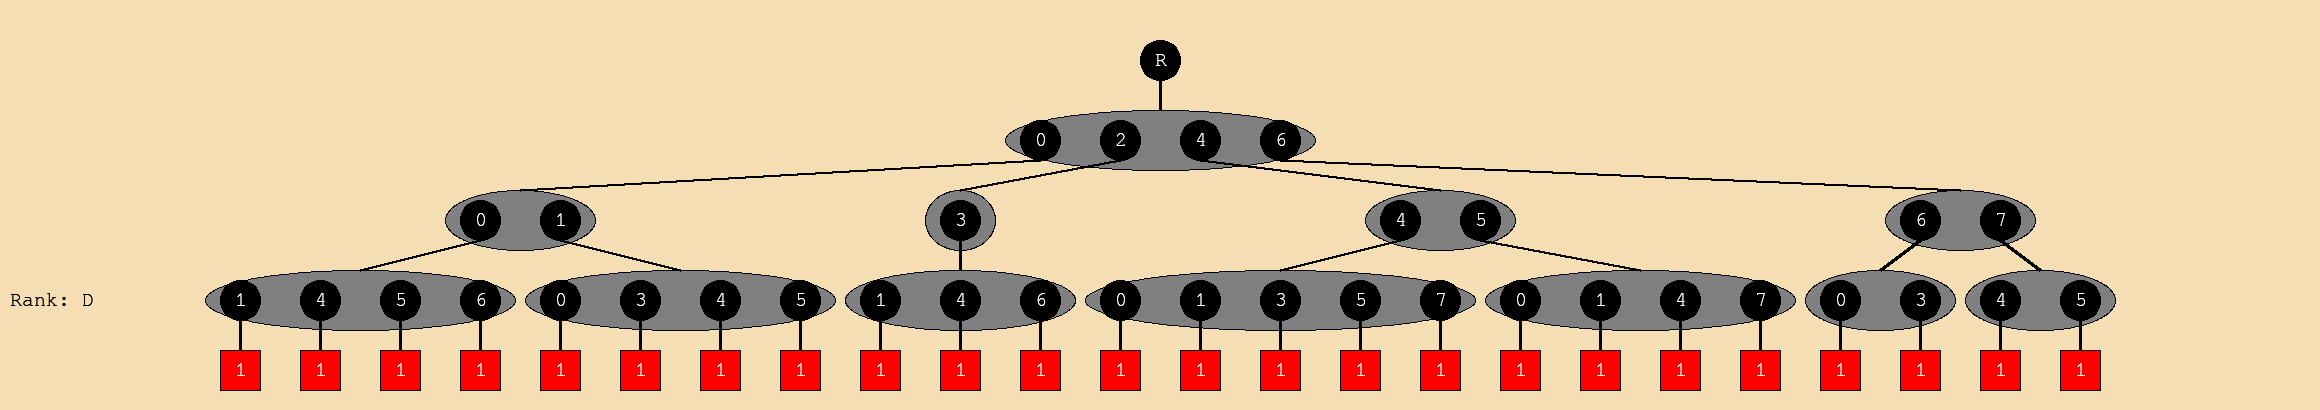

Tiling the srcData vector in coordinate space uniformly with tile size=2


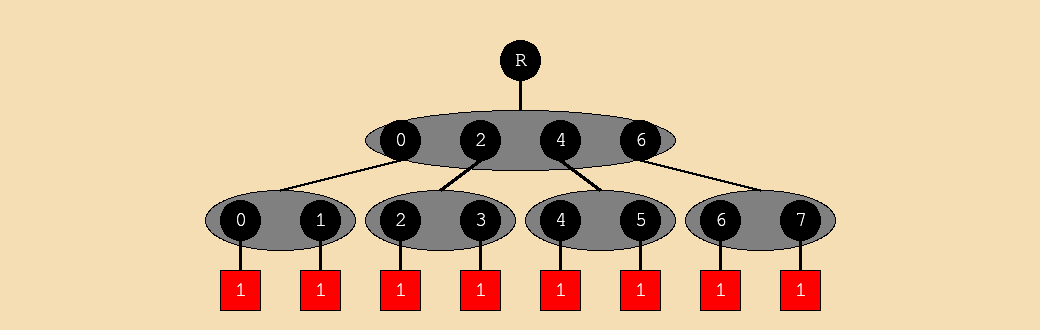

Tiling the dstData vector in coordinate space uniformly with tile size=2


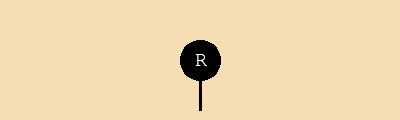

In [151]:
# Create inputs
(dstData, adjMat, srcData) = create_inputs(False)

# Get root fibers
adjMat_s  = adjMat.getRoot()
srcData_v = srcData.getRoot()
dstData_v = dstData.getRoot()

# Tile the adjacency matrix in the source dimension 
print("Tiling the adjacency matrix in coordinate space uniformly with tile size=2")
adjMat_tiled_s1 = adjMat_s.splitUniform(2)

# display the tiled tensor
displayTensor(adjMat_tiled_s1)

# Tile the srcData vector in the src dimension 
print("Tiling the srcData vector in coordinate space uniformly with tile size=2")
srcData_tiled_v1 = srcData_v.splitUniform(2)
displayTensor(srcData_tiled_v1)

# Tile the dstData vector in the dst dimension 
print("Tiling the dstData vector in coordinate space uniformly with tile size=2")
dstData_tiled_v1 = dstData_v.splitUniform(2)
displayTensor(dstData_tiled_v1)

# create a tensor frame
canvas = TensorCanvas(adjMat_tiled_s1, srcData_tiled_v1, dstData)

# perform the tiled src stationary SPMV
for s1, (adjMat_tiled_s0, srcData_tiled_v0) in (adjMat_tiled_s1 & srcData_tiled_v1):
    for s0, (adjMat_tiled_d, srcData_tiled_val) in (adjMat_tiled_s0 & srcData_tiled_v0):
        for d, (dstData_ref, adjMat_tiled_val) in (dstData_v << adjMat_tiled_d):
            dstData_ref += adjMat_tiled_val * srcData_tiled_val
            canvas.addFrame([s1,s0,d], [s1,s0], [d])

# display the canvas animation
displayCanvas(canvas)
